In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.optimize import curve_fit
import seaborn as sns

In [32]:
pixel_to_m = 0.12048e-6 # m +/- 0.003e-6


In [33]:
def bb_box_to_point(bb_box):
    # Get the midpoint of bb_box (x1, y1, x2, y2)
    x1 = bb_box[0]
    y1 = bb_box[1]
    w = bb_box[2]
    h = bb_box[3]
    x_mid = x1 + w/2
    y_mid = y1 + h/2
    return x_mid, y_mid

def dist(x1, y1, x2, y2):
    # return (x2-x1)
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def get_files(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith(".txt"): 
            files.append(file)
    return files

In [34]:
# A set of bad data
bad_data = ['Set10a-0.txt',
 'Set10a-2.txt',
 'Set1a-0.txt',
 'Set1a-3.txt',
 'set1b-0.txt',
 'set1b-5.txt',
 'Set4a-1.txt',
 'set4b-2.txt',
 'set5b-3.txt',
 'Set6a-1.txt',
 'Set6a-2.txt',
 'Set7a-6.txt',
 'set7b-3.txt',
 'Set8a-2.txt',
 'set8b-2.txt',
 'Set3a-0.txt',
 'Set3a-1.txt',
 'Set7a-3.txt',
#  Set10a-0.txt,Set10a-2.txt,Set1a-0.txt,Set1a-3.txt,Set7a-6.txt
 ]
bad_data = ['Set10a-0.txt','Set10a-2.txt','Set1a-0.txt','Set1a-3.txt','Set7a-6.txt',
"Set10a-5.txt",
"Set6a-2.txt",
"set7b-3.txt",
"Set9a-2.txt",
# 'set4b-2.txt','set5b-1.txt','set5b-3.txt','set8b-2.txt'
# 'Set10a-1.txt','Set10a-3.txt','Set10a-4.txt','set1b-0.txt','Set2a-0.txt','Set2a-1.txt','Set2a-2.txt','Set2a-3.txt','Set3a-0.txt','Set3a-1.txt','Set3a-2.txt','set3b-3.txt','Set4a-0.txt','Set4a-1.txt','Set4a-2.txt','Set5a-0.txt','Set5a-1.txt','set5b-0.txt','Set6a-0.txt','Set6a-1.txt','set6b-1.txt','set6b-2.txt','Set7a-2.txt','Set7a-3.txt','Set7a-4.txt','Set7a-5.txt','set7b-0.txt','set7b-2.txt','Set8a-0.txt','Set8a-1.txt','Set8a-2.txt','Set8a-3.txt','Set8a-4.txt','Set8a-5.txt','Set8a-6.txt','set8b-0.txt','set8b-1.txt','set8b-2.txt','Set9a-1.txt','Set9a-3.txt'
]

In [35]:
# print(temp)

# import pyperclip
# pyperclip.copy("','".join(temp))

# Plot Paths

In [200]:
FILEPATH = "output"

file_list = get_files(FILEPATH)

# Remove bad_data from file_list
for bad_file in bad_data:
    file_list.remove(bad_file)

# Open up output/set5b-1.txt, convert each line to point, and plot
t_array = []
r_array = []
x_array = []
y_array = []
temp = []
for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        r_list = []
        t_list = []
        x_list = []
        y_list = []

        x0, y0 = -1, -1
        t0 = 0
        i = 0
        for line in lines:
            bb_box = np.array([float(i) for i in line.split(",")[1:]])*pixel_to_m

            x_mid, y_mid = bb_box_to_point(bb_box)

            t = float(line.split(",")[0])
            if x0 == -1:
                x0, y0 = x_mid, y_mid

            t_list.append(i)
            r_list.append(dist(x0, y0, x_mid, y_mid))
            x_list.append(x_mid-x0)
            y_list.append(y_mid-y0)
            i += 1

        # Ignore stationary ones and the ones that exit the screen
        if(r_list[-1] == r_list[-2] == r_list[-3]) or max(r_list) > 150:
            print(f"Skipping {file}")
            bad_data.append(file)
        # elif(r_list[-1] > 2.8612e-5 or r_list[-1] < 3e-7):
        #     print(f"Skipping {file}, Outlier")
        elif(r_list[-1] > 100*pixel_to_m):
            print(f"Skipping {file}, Outlier")
            temp.append(file)
        else:
            t_array.append(t_list)
            r_array.append(r_list)
            x_array.append(x_list)
            y_array.append(y_list)

Skipping Set2a-2.txt, Outlier
Skipping Set3a-0.txt, Outlier
Skipping Set3a-1.txt, Outlier
Skipping Set3a-2.txt, Outlier
Skipping Set4a-0.txt, Outlier
Skipping Set4a-1.txt, Outlier
Skipping Set5a-0.txt, Outlier
Skipping Set5a-1.txt, Outlier
Skipping Set6a-0.txt, Outlier
Skipping Set7a-3.txt, Outlier
Skipping Set7a-4.txt, Outlier
Skipping set7b-0.txt, Outlier
Skipping Set8a-0.txt, Outlier
Skipping Set8a-1.txt, Outlier
Skipping Set8a-3.txt, Outlier
Skipping Set8a-4.txt, Outlier
Skipping Set8a-5.txt, Outlier
Skipping set8b-1.txt, Outlier
Skipping set8b-2.txt, Outlier
Skipping Set9a-1.txt, Outlier
Skipping Set9a-3.txt, Outlier


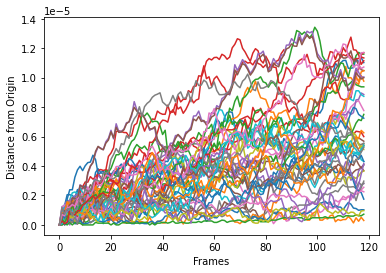

In [197]:
plt.figure(figsize=(6,4))

# Plot t_array and r_array
for i in range(len(t_array)):
    plt.plot(t_array[i], r_array[i], label=file_list[i])

plt.xlabel("Frames")
plt.ylabel("Distance from Origin")
plt.savefig('distance-time.png')

119
119
[0.0, 4.4864147958301314e-07, 5.721399162656116e-07, 7.856671052755558e-07, 8.768709098682505e-07, 1.0583735323075782e-06, 1.072760934976061e-06, 1.2018818579398663e-06, 1.3232663240213108e-06, 1.3199044104720582e-06, 1.4557651217716643e-06, 1.5569353435325578e-06, 1.6355560855675564e-06, 1.7986920231859248e-06, 1.926594161070836e-06, 1.940422488154157e-06, 1.9299744382866757e-06, 1.943433576647009e-06, 1.995751690296077e-06, 2.03491186322587e-06, 2.090485617521421e-06, 2.0864637584948463e-06, 2.1624545031289064e-06, 2.240867739611145e-06, 2.2456508166317784e-06, 2.2618518505292854e-06, 2.3557676546759684e-06, 2.4009664967167576e-06, 2.5280411691072504e-06, 2.611481883910797e-06, 2.704129575426361e-06, 2.724303287611859e-06, 2.7760898468670464e-06, 2.747329573779968e-06, 2.7576207209316997e-06, 2.833334617009049e-06, 2.985754343948632e-06, 2.9564346348734314e-06, 2.943057996255662e-06, 2.9492047533069214e-06, 2.986690221881264e-06, 3.0563547120689723e-06, 3.08282759666045e-06, 

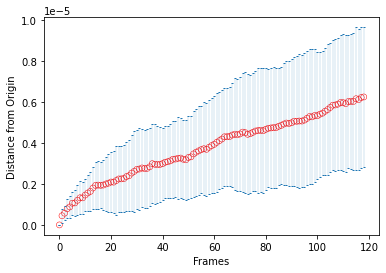

In [202]:
average_r = []
print(len(t_array[0]))
print(len(r_array[0]))

while i < len(r_array):
    if len(r_array[i]) != 119:
        r_array.pop(i)
    else:
        i += 1

r_nparray = np.array(r_array)

stdev_r = []

for i in range(len(t_array[0])):
    average_r.append(np.sum(r_nparray[:, i])/len(r_array))
    stdev_r.append(np.std(r_nparray[:, i]))
print(average_r)
plt.scatter(t_array[0], average_r, facecolors='none', edgecolors='r', linewidths=0.5)
plt.errorbar(t_array[0], average_r, stdev_r, capsize=1, elinewidth=0.2, linewidth=0)

plt.xlabel("Frames")
plt.ylabel("Distance from Origin")
plt.savefig('average_distance-time.png')

[4.43424466e-08 1.11515044e-06]
[[ 3.10865394e-19 -1.83410583e-17]
 [-1.83410583e-17  1.44894360e-15]]


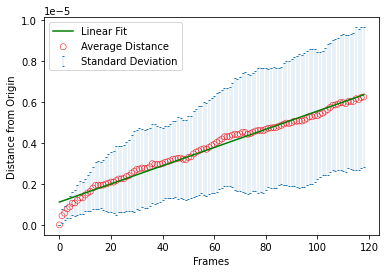

In [207]:
plt.figure(figsize=(6,4))

z, c = np.polyfit(t_array[0], average_r, 1, cov=True)
print(z)
print(c)
plt.scatter(t_array[0], average_r, facecolors='none', edgecolors='r', linewidths=0.5)
plt.errorbar(t_array[0], average_r, stdev_r, capsize=1, elinewidth=0.2, linewidth=0)
plt.plot(t_array[0], z[1] + np.array(t_array[0]) * z[0], 'g')
degrees = [1]
plt.xlabel("Frames")
plt.ylabel("Distance from Origin")
plt.legend(['Linear Fit', 'Average Distance', 'Standard Deviation'])
plt.savefig('average_fit_distance-time.png')


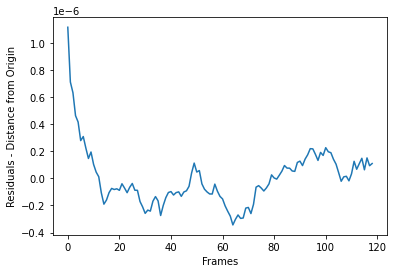

In [204]:
plt.figure(figsize=(6,4))

resid = [z[1] + np.array(t_array[0]) * z[0] - average_r]
plt.plot(t_array[0], resid[0])
plt.xlabel("Frames")
plt.ylabel("Residuals - Distance from Origin")
plt.savefig('distance-resid.png')

In [191]:
stdev_r.pop(0)
t_array[0].pop(0)
average_r.pop(0)
chi_squared = np.sum(((np.polyval(z, t_array[0]) - average_r)/stdev_r) ** 2)
print(chi_squared)

10.128841052750941
10.12884105275093


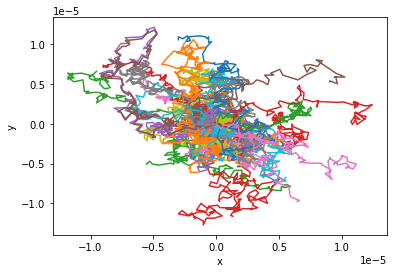

In [198]:
plt.figure(figsize=(6,4))

# Plot x_array and y_array
for i in range(len(x_array)):
    plt.plot(x_array[i], y_array[i], label=file_list[i])

plt.xlabel("x")
plt.ylabel("y")
plt.savefig('distance-2d.png')

In [39]:
last_y_arr = np.array([y_array[i][-1] for i in range(len(y_array))])
last_x_arr = np.array([x_array[i][-1] for i in range(len(x_array))])

dist_arr = np.sqrt(last_x_arr**2 + last_y_arr**2)
# Standard deviation of dist_arr
std_dev = np.std(dist_arr)
avg = np.mean(dist_arr)
avg + 1.5 * std_dev

print(avg)

# 2.8612e-5

6.364785992204703e-06


In [40]:
%matplotlib widget # Will require pip install ipympl

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot t_array against x_array and y_array in a 3d plot
for i in range(len(t_array)):
    ax.plot(t_array[i], x_array[i], y_array[i], label=file_list[i])

ax.set_xlabel('Frames')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.show() 

UsageError: unrecognized arguments: # Will require pip install ipympl


# Make Histogram

In [41]:
step_sizes = []

FILEPATH = "output"

file_list = get_files(FILEPATH)

# Remove bad_data from file_list
for bad_file in bad_data:
    file_list.remove(bad_file)

# Open up output/set5b-1.txt, convert each line to point, and plot

for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        x0, y0 = -1, -1
        i = 0

        for line in lines:
            bb_box = [float(i) for i in line.split(",")[1:]]

            x_mid, y_mid = bb_box_to_point(bb_box)
            x_mid *= pixel_to_m
            y_mid *= pixel_to_m

            if i > 0:
                step_sizes.append(dist(x0, y0, x_mid, y_mid))
            x0, y0 = x_mid, y_mid
            i += 1

In [42]:
step_sizes_x = []
step_sizes_y = []
for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        x0, y0 = -1, -1
        i = 0

        for line in lines:
            bb_box = [float(i) for i in line.split(",")[1:]]

            x_mid, y_mid = bb_box_to_point(bb_box)
            x_mid *= pixel_to_m
            y_mid *= pixel_to_m

            if i > 0:
                step_sizes_x.append(x0 - x_mid)
                step_sizes_y.append(y0 - y_mid)
            x0, y0 = x_mid, y_mid
            i += 1

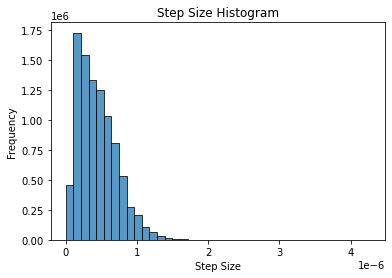

In [43]:
# Histogram of step sizes
fig = plt.figure()
# plt.hist(step_sizes, bins=25)
sns.histplot(data=step_sizes, stat='density', bins=40)
plt.xlabel("Step Size")
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
plt.show()
fig.savefig('stepsize-hist.png')

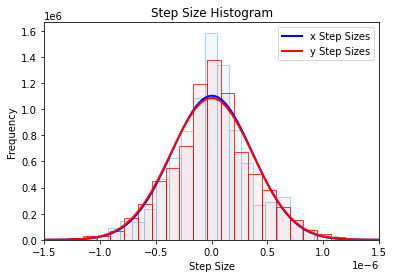

In [44]:
from scipy.stats import norm
# Histogram of x and y step sizes
fig = plt.figure()
ax = plt.axes()

mu_x, std_x = norm.fit(step_sizes_x)
mu_y, std_y = norm.fit(step_sizes_y)

# plt.hist(step_sizes, bins=25)
sns.histplot(data=step_sizes_x, stat='density', color=None, edgecolor="skyblue", alpha=0.05, bins=40)

x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(-1.5e-6, x1, 100)
y_pdf = norm.pdf(x_pdf, mu_x, std_x)
ax.plot(x_pdf, y_pdf, 'b', lw=2, label='pdf')

sns.histplot(data=step_sizes_y, stat='density', color="red", edgecolor="red", alpha=0.05, bins=40)
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = norm.pdf(x_pdf, mu_y, std_y)
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')

ax.legend()

plt.xlabel("Step Size")
plt.xlim((-1.5e-6, 1.5e-6))
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
plt.legend(labels=['x Step Sizes', 'y Step Sizes'])

plt.show()

fig.savefig('stepsize-hist.png')

# Compute the value of $k$

In [45]:
from uncertainties import ufloat
import uncertainties

# Definitions
bead_diameter = ufloat(1.9e-6, 0.1e-6)
viscosity = ufloat(0.001, 0.00005)
T = ufloat(296.5, 0.5)
t = ufloat(0.5, 0.03)
gamma = 6*np.pi*0.5*bead_diameter*viscosity

# Uncertainty Definitions
step_size_unc = 0.1e-6 # 5% uncertainty


## Method 1 (Histogram Fitting)

In [46]:
def f(x, a):
    # PDF
    return x/(2*a) * np.exp(-x**2/(4*a))
    
bin_size = 40

# Get frequency of each step size
step_sizes_hist = np.histogram(step_sizes, bins=bin_size)
step_size, freq = step_sizes_hist[1][:-1] , step_sizes_hist[0]
freq = freq / (np.sum(freq) * (step_size[1] - step_size[0]))

# Fit f(x) to step_size, freq
h = step_size[1] - step_size[0]
step_size = step_size + h/2
popt, pcov = curve_fit(f, step_size, freq, p0=[1e-14])
print(popt)

[5.93116394e-14]


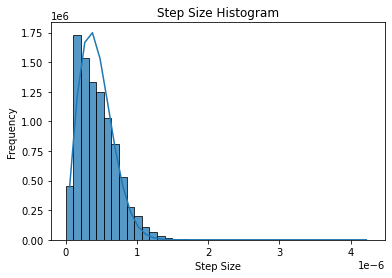

In [48]:
# Plot fitted curve against histogram
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
sns.histplot(data=step_sizes, stat='density', bins=bin_size)
ax.plot(step_size, f(step_size, *popt), label="Fitted Rayleigh Distribution")
plt.xlabel("Step Size")
plt.ylabel("Frequency")
plt.title("Step Size Histogram")
fig.savefig('stepsize-frequency-hist.png')

In [50]:
# METHOD ONE
fit = np.asarray(uncertainties.correlated_values(popt, pcov))[0]
D = fit/t
print(D)
k1 = D*gamma/T
print(k1)

(1.19+/-0.10)e-13
(7.2+/-0.8)e-24


## Method Two (Mean Square Average)

In [51]:
# Method TWO
r = np.array([ufloat(i, step_size_unc) for i in step_sizes])
r2_sum = sum(r**2)/len(r)
D = r2_sum/(4*t)
print(D)
k2 = D*gamma/T
print(k2)

(1.33+/-0.08)e-13
(8.0+/-0.8)e-24


In [52]:
# Standard Deviations Away
k_actual = 1.38e-23
print(f"k1 is {np.abs(k_actual - k1.nominal_value)/k1.std_dev :.2f} standard deviations away")
print(f"k2 is {np.abs(k_actual - k2.nominal_value)/k2.std_dev :.2f} standard deviations away")

k1 is 8.57 standard deviations away
k2 is 7.67 standard deviations away


## Ignore Below

In [ ]:
r_list = []
for file in file_list:
    with open(FILEPATH + "/" + file, "r") as f:
        lines = f.readlines()

        x0, y0 = -1, -1
        i = 0

        for line in lines:
            bb_box = np.array([float(i) for i in line.split(",")[1:]])*pixel_to_m

            r_list.append((bb_box[2]+bb_box[3])/2)

            break

In [ ]:
# Plot histogram of r
fig = plt.figure(figsize=(20,10))
sns.histplot(data=r_list, stat='density', bins=40)
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.title("Radius Histogram")
fig.savefig('radius-freq-hist.png', dpi=400)

In [ ]:
# Get average r
r_avg = np.mean(r_list)
r_avg

In [ ]:
r_avg/bead_diameter

In [ ]:
60*pixel_to_m

In [ ]:
1.9e-6/np.median(r_list)

In [ ]:
53*pixel_to_m/bead_diameter